In [1]:
!python -m pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
data = pd.read_csv ('Electric_Production.csv')

In [4]:
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [5]:
data.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [6]:
data.rename(columns={'IPG2211A2N': 'production_quantity','DATE': 'date'}, inplace=True)

In [7]:
data

,date,production_quantity
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [8]:
data.shape

(397, 2)

In [9]:
data.head(30)

,date,production_quantity
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [10]:
data.dtypes

date                    object
production_quantity    float64
dtype: object

In [11]:
data.head()


,date,production_quantity
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [12]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [20]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

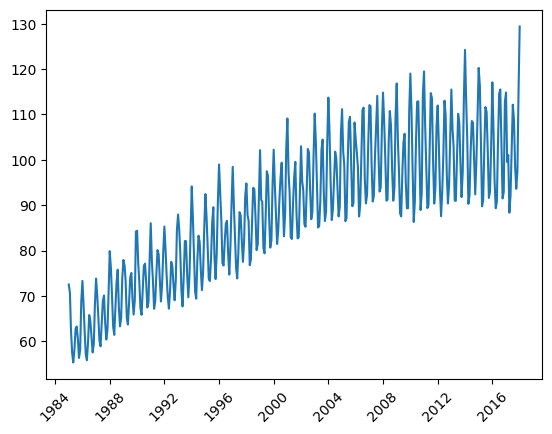

In [23]:
plt.plot(data.date, data['production_quantity'], label = "production_quantity") 
plt.xticks(rotation=45) 
plt.show()


In [15]:
# ADF Test
result = adfuller(data['production_quantity'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -2.25699035004725
n_lags: 0.18621469116586592
p-value: 0.18621469116586592
Critial Values:
   1%, -3.4476305904172904
Critial Values:
   5%, -2.869155980820355
Critial Values:
   10%, -2.570827146203181


In [25]:
def kpss_test(data, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(data, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data['production_quantity'],regression='ct')

KPSS Statistic: 0.5051030832418743
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


C:\Users\User\AppData\Local\Temp\ipykernel_21276\3695924611.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(data, **kw)
